In [1]:
!pip install datasets -q

In [2]:
import pandas as pd
import numpy as np
from datasets import list_datasets, load_dataset
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
dataset = load_dataset('AndriyBilinskiy/ukr-news', split='train')

In [4]:
df_init = dataset.to_pandas()

In [5]:
df_init

,title,text,category
0,"Рік Лебедя обіцяє дива, вірність і шляхетність...","Про те, яким він буде та що нам принесе, розпо...",astro
1,Кому зі знаків зодіаку поталанить 2024 року,"Дракон – авторитетна тварина, велична, символ ...",astro
2,Що зірки нам пророкують: гороскоп на 4-10 груд...,"До 13 грудня період спадного Місяця, який ідеа...",astro
3,"Рибам слід дослухатися до інтуїції, а Водоліям...",Гороскоп для всіх знаків зодіаку за картами Та...,astro
4,Якому знаку зодіаку пощастить 4-5 грудня,"Обставини нашого життя змінюються постійно, то...",astro
...,...,...,...
22265,Україна збиватиме ракетами російські дрони з К...,Українські військові мають намір збивати росій...,war
22266,"Окупанти прийняли ""закон"" про держкордон ""ДНР""...",Так звана «Народна Рада» самопроголошеної «ДНР...,war
22267,Україна провела військові маневри з протидесан...,Українські військові на одному з полігонів бой...,war
22268,Бойовики зазнали масштабних втрат на Донбасі,"За тиждень з 22 по 28 листопада 2019 року, втр...",war


In [6]:
df_init.text[1]

'Дракон – авторитетна тварина, велична, символ імператорської влади Китаю. Вступає у свої права у другий молодик після дня зимового сонцестояння 21 грудня 2023 року і наділяє період відповідними якостями та характеристиками. 2024 року – це 10 лютого. Китайський календар використовує шістдесятирічний цикл. Попередні роки Зеленого Дерев\'яного Дракона були у 1904 та 1964 роках, розповідає астрологиня Марина Скаді (Марина Соколова) . Стихія 2024-го — Дерево, що надає величезні можливості. Як правило, дерево дає плоди, а це потенціал життєвої енергії. Якщо робити правильні кроки, то кожен із нас зможе рвонути вгору у своєму розвитку. Коріння – батьківські настанови, отримані в ранньому дитинстві та що впливають на соціальну інтеграцію, яку символізує ґрунт. Зелений колір – життєствердний символ оновлення. У східній культурі означає спокій, гнучкість, вміння підлаштовуватися під обставини з вигодою та користю собі. Зелена крона – свідчення здоров\'я та бурхливого зростання дерева. Дракон – 

In [7]:
df_init['category'].value_counts(normalize=True)

war         0.182308
polit       0.167086
economic    0.166951
health      0.164212
science     0.151100
auto        0.035788
glamur      0.035294
tourism     0.034441
astro       0.031432
sport       0.031388
Name: category, dtype: float64

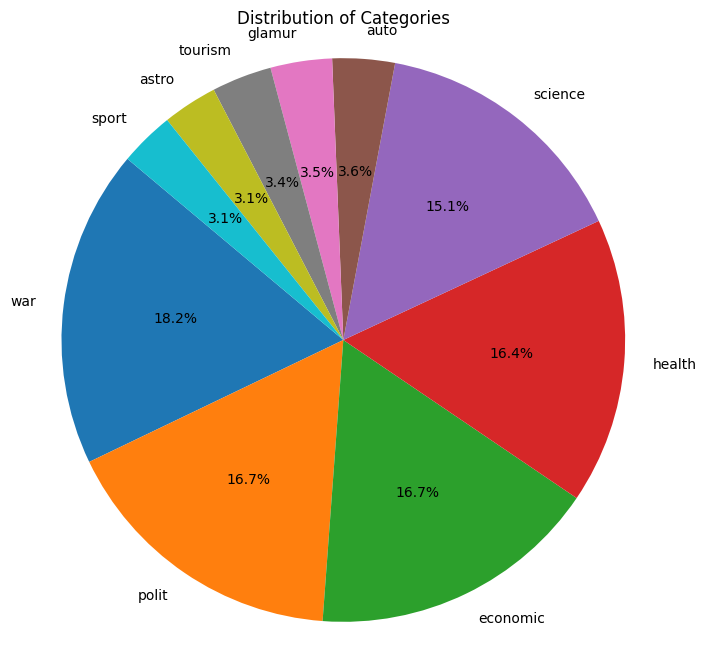

In [8]:
categories = df_init['category'].value_counts(normalize=True)

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(categories, labels=categories.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Categories')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [9]:
df = df_init[df_init['category'].isin(['war', 'polit', 'economic', 'health', 'science'])]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    df.text, df.category, test_size=0.2, random_state=19
)

In [11]:
X_train

17752    За весь період пандемії 8 із 10 померлих від C...
15739    РФ готується влаштувати теракт на ЗАЕС / фото ...
18520    Після кількох місяців напруженого контрнаступу...
9452     Валютні спекулянти за такої системи оподаткува...
7652     Наша страна вышла на завершающий этап строител...
                               ...                        
10201    У Зеленського оцінили, чи змінили Індія та Кит...
3307     Як провідний хірург-травматолог військового го...
3642     В Україні дозволили одночасно вводити вакцини ...
20890    На сході України будуть і надалі люті бої, вва...
14611    Керівник компанії Facebook Inc. Марк Цукерберг...
Name: text, Length: 14816, dtype: object

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

In [13]:
tfidf_vectorizer = TfidfVectorizer(max_features=10000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [14]:
X_train_tfidf

<14816x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 2827808 stored elements in Compressed Sparse Row format>

In [15]:
model = LogisticRegression(random_state=12)
model.fit(X_train_tfidf, y_train)
predictions = model.predict(X_test_tfidf)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [16]:
predictions

array(['science', 'economic', 'science', ..., 'health', 'health',
       'health'], dtype=object)

<Figure size 2000x2000 with 0 Axes>

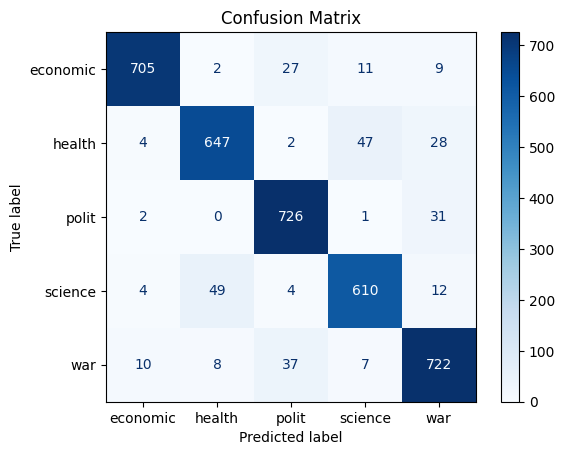

In [17]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tabulate import tabulate
plt.figure(figsize=(20, 20))

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Display confusion matrix
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=np.unique(y_test))
disp.plot(cmap=plt.cm.Blues, values_format=".0f")
plt.title('Confusion Matrix')
plt.show()

In [18]:
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")
# print("\nClassification Report:")
print(classification_report(y_test, predictions))

Accuracy: 0.9203778677462888
              precision    recall  f1-score   support

    economic       0.97      0.94      0.95       754
      health       0.92      0.89      0.90       728
       polit       0.91      0.96      0.93       760
     science       0.90      0.90      0.90       679
         war       0.90      0.92      0.91       784

    accuracy                           0.92      3705
   macro avg       0.92      0.92      0.92      3705
weighted avg       0.92      0.92      0.92      3705



In [19]:
print(confusion_matrix(y_test, predictions))

[[705   2  27  11   9]
 [  4 647   2  47  28]
 [  2   0 726   1  31]
 [  4  49   4 610  12]
 [ 10   8  37   7 722]]


#SVM

In [20]:
from sklearn.svm import SVC

In [21]:
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_tfidf, y_train)

SVC(kernel='linear')

In [22]:
predictions = svm_model.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, predictions)

In [23]:
print(f"Accuracy: {accuracy:.2f}")
# print("Classification Report:")
print(classification_report(y_test, predictions))

Accuracy: 0.93
              precision    recall  f1-score   support

    economic       0.96      0.95      0.96       754
      health       0.92      0.90      0.91       728
       polit       0.95      0.96      0.96       760
     science       0.90      0.90      0.90       679
         war       0.92      0.93      0.93       784

    accuracy                           0.93      3705
   macro avg       0.93      0.93      0.93      3705
weighted avg       0.93      0.93      0.93      3705



<Figure size 2000x2000 with 0 Axes>

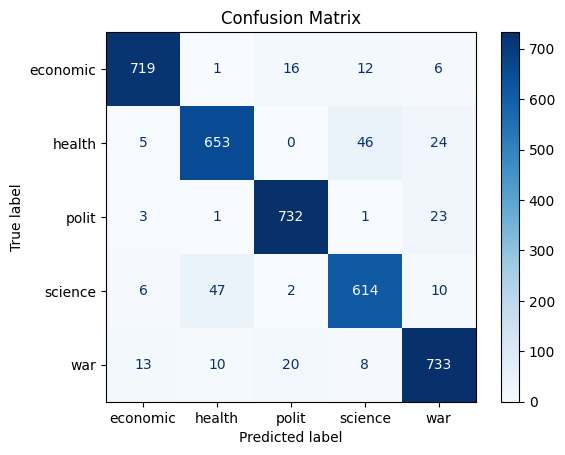

In [24]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tabulate import tabulate
plt.figure(figsize=(20, 20))

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Display confusion matrix
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=np.unique(y_test))
disp.plot(cmap=plt.cm.Blues, values_format=".0f")
plt.title('Confusion Matrix')
plt.show()